In [1]:
import sys
import copy
import emcee
import corner
import numpy as np
import matplotlib.pyplot as plt
from mods import prep, plotter
from scipy import optimize
%matplotlib inline
%load_ext autoreload

sys.path.append('./ligbind/')
import ligbind

In [2]:
def wymsol(var,parm,rtot,ltot):
    
    k11 = parm[0]
    k21 = parm[1]
    k22 = parm[2]
    l20 = parm[3]
    
    (L, M, MM, ML, MML, MMLL) = var
    
    eq1 = M + 2*MM + ML + 2*MML + 2*MMLL - rtot
    eq2 = L + ML + MML + 2*MMLL - ltot
    eq3 = l20 * M**2 - MM
    eq4 = k11 * L * M - ML
    eq5 = l20 * k21 * M**2 * L - MML
    eq6 = l20 * k21 * k22 * M**2 * L**2 - MMLL
    
    return np.array([eq1,eq2,eq3,eq4,eq5,eq6])

In [3]:
guess = (1000.,1000.,1000.,1000.,1000.,1000.)

In [4]:
parm4 = np.array([5.,5.,0.5,500.])

In [5]:
ligser = ligbind.helpers.dilser()

In [6]:
rtot = np.array([1e-4,1e-3,1e-2,1e-1,1e0])

In [7]:
def frax(res):
    L = res[:,0]
    M = res[:,1]
    MM = res[:,2]
    ML = res[:,3]
    MML = res[:,4]
    MMLL = res[:,5]
    
    Mfree = M + 2*MM
    
    Mtot = M + ML + 2*MM + 2*MML + 2*MMLL
    
    Ltot = L + ML + MML + 2*MMLL
    
    Mbound = ML + 2*MML + 2*MMLL
    
    Lbound = ML + MML + 2*MMLL
    
    Lfree_check = Ltot - Lbound
    
    Mfree_check = Mtot - Mbound
    
    Monomer = M + ML
    
    Dimer = 2*MM + 2*MML + 2*MMLL #quantified as monomer, i.e., [MM] = 2[M]
    
    Monfrac = Monomer/Mtot
    
    Dimfrac = Dimer/Mtot
    
    Mon_bfrac = ML/Monomer
    
    Dim_bfrac = (MML + 2*MMLL)/Dimer
    
    Bfrac = Lbound/Mtot
    
    
    return np.array([L,M,MM,ML,MML,MMLL,Bfrac,Monfrac,Dimfrac,Mon_bfrac,Dim_bfrac,Mtot])

In [8]:
colnames = ['L','M','MM','ML','MML','MMLL','Bfrac','Monfrac','Dimfrac','Mon_bfrac','Dim_bfrac','Mtot']

In [9]:
wymsol(guess,parm4,rtot[0],ligser[0])

array([  7.99999990e+03,   4.99999900e+03,   4.99999000e+08,
         4.99900000e+06,   2.50000000e+12,   1.25000000e+15])

In [10]:
res_mult = np.array([[optimize.root(wymsol,guess,args=(parm4,j,i),method='lm',options={'factor':0.1}).x for i in ligser] for j in rtot])

In [11]:
fraxres = [frax(i) for i in res_mult]

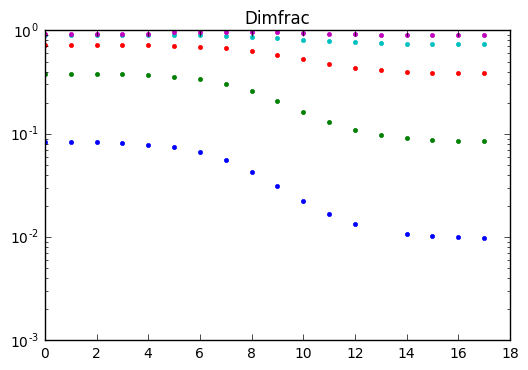

In [12]:
ind = 8
for i,j in enumerate(fraxres):
    plt.semilogy((j[ind]),'.',label=rtot[i])
    #plt.legend()
    plt.title(colnames[ind])

In [13]:
parm5 = np.array([5.3,5.2,0.37,502.])

In [14]:
res_mult5 = np.array([[optimize.root(wymsol,guess,args=(parm5,j,i),method='lm',options={'factor':0.1}).x for i in ligser] for j in rtot])

In [15]:
fraxres5 = [frax(i) for i in res_mult5]

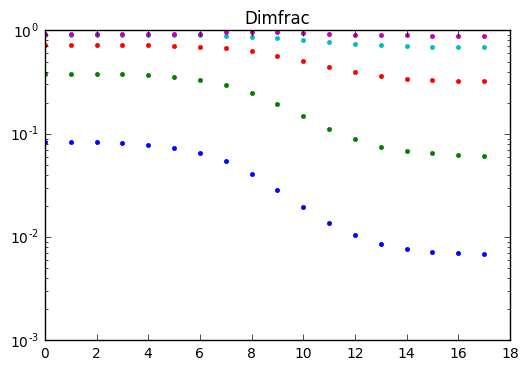

In [16]:
ind = 8
for i,j in enumerate(fraxres5):
    plt.semilogy((j[ind]),'.',label=rtot[i])
    #plt.legend()
    plt.title(colnames[ind])

In [17]:
res_mult5[0][:,1]

array([  9.11350518e-05,   9.06947669e-05,   8.98268165e-05,
         8.81397396e-05,   8.49485455e-05,   7.92117531e-05,
         6.97840099e-05,   5.63629235e-05,   4.07016638e-05,
         2.61599192e-05,   1.52566298e-05,   8.32041131e-06,
         4.35785251e-06,   2.23193822e-06,   1.12971078e-06,
         5.68354535e-07,   2.85060190e-07,   1.42751857e-07])

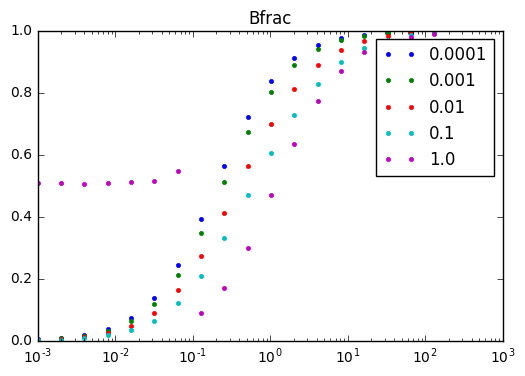

In [18]:
ind = 6
for i,j in enumerate(fraxres5):
    plt.semilogx(ligser,(j[ind]),'.',label=rtot[i])
    plt.legend()
    plt.title(colnames[ind])

In [19]:
fraxres5[1][1]

array([  6.15021979e-04,   6.12710505e-04,   6.08142305e-04,
         5.99218723e-04,   5.82176384e-04,   5.50981139e-04,
         4.98037265e-04,   4.18590300e-04,   3.18570180e-04,
         2.16666449e-04,   1.32736528e-04,   7.49982210e-05,
         4.01551670e-05,   2.08235058e-05,   1.06101655e-05,
         5.35630432e-06,   2.69116860e-06,   1.34886536e-06])

In [20]:
def dimfun(rtot,l20):
    k = 1/l20
    a = 4.
    b = -(4.*rtot + k)
    c = rtot**2
    rad = np.sqrt(b**2 - 4*a*c)
    
    D = (-b - rad)/(2*a)
    
    return D, 2*D/rtot

In [21]:
dimfun(0.001,100)

(7.2949016875157625e-05, 0.14589803375031524)

In [22]:
rtot

array([  1.00000000e-04,   1.00000000e-03,   1.00000000e-02,
         1.00000000e-01,   1.00000000e+00])

In [23]:
dimfun(rtot,0.00001)[1]

array([  0.00000000e+00,   1.81898940e-08,   2.00088834e-07,
         1.99997885e-06,   1.99992028e-05])

In [24]:
1/1000.

0.001

In [25]:
dimfun(rtot,0.001)[1]

array([  2.00088834e-07,   2.00000727e-06,   1.99992002e-05,
         1.99920040e-04,   1.99203978e-03])

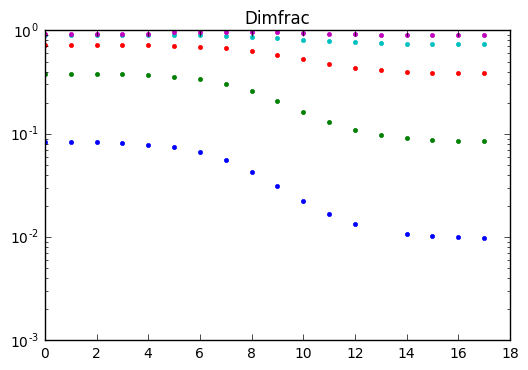

In [26]:
ind = 8
for i,j in enumerate(fraxres):
    plt.semilogy((j[ind]),'.',label=rtot[i])
    #plt.legend()
    plt.title(colnames[ind])

In [27]:
berbfun = dimfun(rtot,500.)[1]

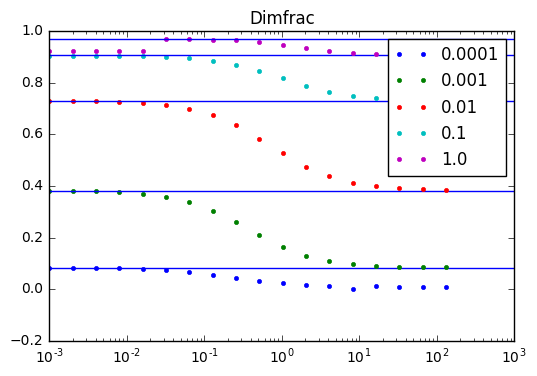

In [28]:
ind = 8
for i,j in enumerate(fraxres):
    plt.semilogx(ligser,(j[ind]),'.',label=rtot[i])
    plt.axhline(berbfun[i])
    plt.legend()
    plt.title(colnames[ind])

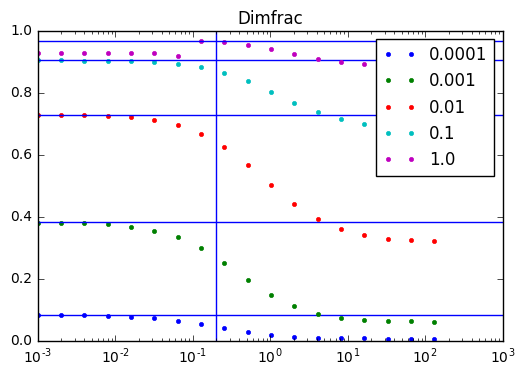

In [29]:
ind = 8
for i,j in enumerate(fraxres5):
    plt.semilogx(ligser,(j[ind]),'.',label=rtot[i])
    plt.axhline(berbfun[i])
    plt.legend()
    plt.title(colnames[ind])
plt.axvline(0.2)

In [30]:
1./5.

0.2

In [31]:
parm5

array([  5.30000000e+00,   5.20000000e+00,   3.70000000e-01,
         5.02000000e+02])

In [32]:
parmsets = [np.random.normal(1,0.05,4) * parm5 for i in range(100)]

In [33]:
np.array([1,2,3,4]) * np.array([1,2,3,4])

array([ 1,  4,  9, 16])

In [34]:
res_mult5 = [np.array([[optimize.root(wymsol,guess,args=(q,j,i),method='lm',options={'factor':0.1}).x for i in ligser] for j in rtot]) for q in parmsets]

In [35]:
fraxresset = [[frax(i) for i in j] for j in res_mult5]

In [36]:
len(fraxresset)

100

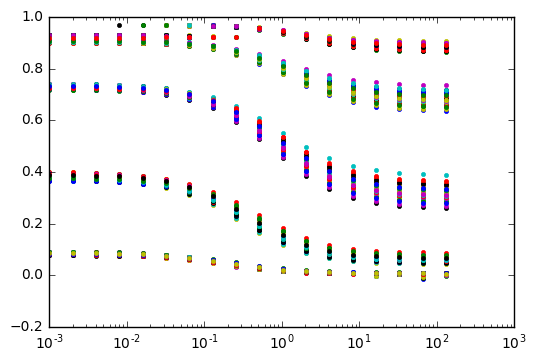

In [37]:
ind = 8
for z in fraxresset:
    for i,j in enumerate(z):
        plt.semilogx(ligser,(j[ind]),'.',label=rtot[i])
    #plt.axhline(berbfun[i])
    #plt.legend()
    #plt.title(colnames[ind])
#plt.axvline(0.2)

In [119]:
fraxressetar = np.array(fraxresset)

In [120]:
fraxressetar.shape

(100, 5, 12, 18)

In [121]:
fraxressetar[99][0][8]

array([ 0.08287429,  0.08247959,  0.08170213,  0.08019331,  0.07734796,
        0.07226178,  0.06398598,  0.05238935,  0.03914538,  0.02714171,
        0.01833612,  0.01282441,  0.00970784,  0.00804557,  0.00718645,
        0.00674961,  0.00652934,  0.0051491 ])

In [122]:
a = [np.array([i[j][8] for i in fraxresset]) for j in range(5)]

In [123]:
lube = [i.mean(axis=0) for i in a]

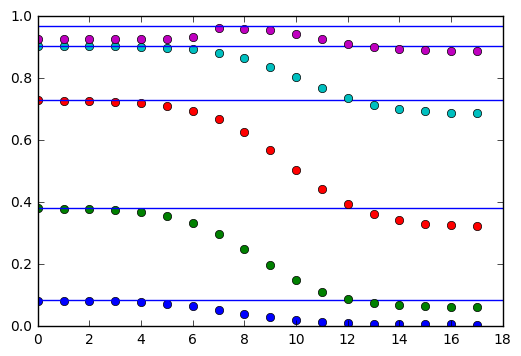

In [124]:
for i in range(5):
    plt.plot(lube[i],'o')
    plt.axhline(berbfun[i])

In [125]:
berbfun[4]

0.96887327079826424

In [40]:
parm6 = np.array([5.3,5.2,0.37,5000.])

In [127]:
parmsets6 = [np.random.normal(1,0.05,4) * parm6 for i in range(100)]

In [128]:
res_mult6 = [np.array([[optimize.root(wymsol,guess,args=(q,j,i),method='lm',options={'factor':0.1}).x for i in ligser] for j in rtot]) for q in parmsets6]

In [129]:
fraxst6 = [[frax(i) for i in j] for j in res_mult6]

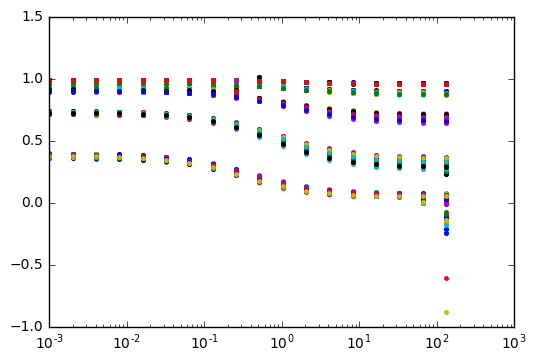

In [130]:
ind = 8
for z in fraxst6:
    for i,j in enumerate(z):
        plt.semilogx(ligser,(j[ind]),'.',label=rtot[i])

In [131]:
fraxst6_slc = [np.array([i[j][8] for i in fraxst6]) for j in range(5)]

In [132]:
solmean6 = [i.mean(axis=0) for i in fraxst6_slc]

In [133]:
nats6 = dimfun(rtot,5000)[1]

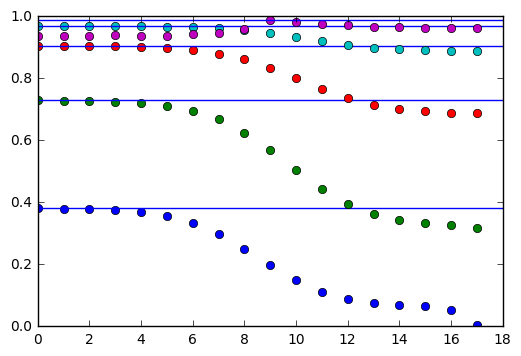

In [134]:
for i in range(5):
    plt.plot(solmean6[i],'o')
    plt.axhline(nats6[i])

In [135]:
rtot

array([  1.00000000e-04,   1.00000000e-03,   1.00000000e-02,
         1.00000000e-01,   1.00000000e+00])

In [136]:
1/5000

0.0002

In [38]:
def numsl(parms,rtot,ligser):
    #numerically solves wyman system of eqs for given rtots and ligand concs
    #solves against 100 randomly noise parm sets (noises +/- 5% of parm val)
    parmsets = [np.random.normal(1,0.05,4) * parms for i in range(100)]
    resset = [np.array([[optimize.root(wymsol,guess,args=(q,j,i),method='lm',options={'factor':0.1}).x for i in ligser] for j in rtot]) for q in parmsets]
    fraxset = [[frax(i) for i in j] for j in resset]
    
    return fraxset
    
    

In [41]:
h = numsl(parm6,rtot,ligser)

In [42]:
def slcmn(fraxset, ind):
    #computes mean solution
    #currently hardwired for rtot array of length 5
    slc = [np.array([i[j][ind] for i in fraxset]) for j in range(5)]
    mn = [i.mean(axis=0) for i in slc]
    
    return mn

In [43]:
slcmn(h,8)

[array([ 0.38130455,  0.38039581,  0.37859538,  0.3750611 ,  0.3682467 ,
         0.35554678,  0.33328476,  0.29804924,  0.25012665,  0.19647684,
         0.147918  ,  0.11181728,  0.08882715,  0.07425384,  0.06853876,
         0.06456685,  0.0481622 , -0.01931214]),
 array([ 0.72935126,  0.72874477,  0.72753943,  0.72515871,  0.7205127 ,
         0.71165012,  0.69542528,  0.66769695,  0.62496868,  0.56763239,
         0.50250847,  0.44099482,  0.39266974,  0.36033145,  0.34112622,
         0.33056485,  0.32493336,  0.31786361]),
 array([ 0.90467917,  0.90444426,  0.90397676,  0.90305087,  0.9012345 ,
         0.89773521,  0.89121369,  0.87972739,  0.86117493,  0.83453584,
         0.80146293,  0.76681872,  0.7366632 ,  0.71469126,  0.70083885,
         0.69293741,  0.68869485,  0.68648608]),
 array([ 0.96882117,  0.96875631,  0.96862686,  0.96836895,  0.96785725,
         0.96685061,  0.96490621,  0.96129314,  0.95506711,  0.94557118,
         0.93321731,  0.91980414,  0.90779724,  0.

In [44]:
def pltres(mn,rtot,parms):
    for i in range(5):
        plt.plot(mn[i],'o')
        plt.axhline((dimfun(rtot,parms[-1])[1])[i])

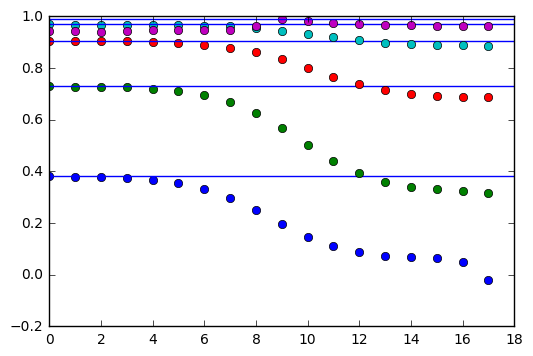

In [45]:
pltres(slcmn(h,8),rtot,parm6)

In [158]:
parm6[-1]

5000.0

In [157]:
#h = numsl(parm6,rtot*2.41,ligser)

ValueError: too many values to unpack (expected 6)

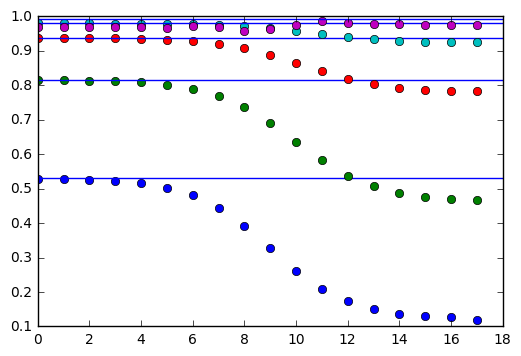

In [64]:
pltres(slcmn(h,8),rtot*2.41,parm6)

In [65]:
parm6

array([  5.30000000e+00,   5.20000000e+00,   3.70000000e-01,
         5.00000000e+03])

In [66]:
parm7 = np.array([10.3,5.3,0.52,100.])

In [67]:
#h = numsl(parm7,rtot*2.41,ligser)

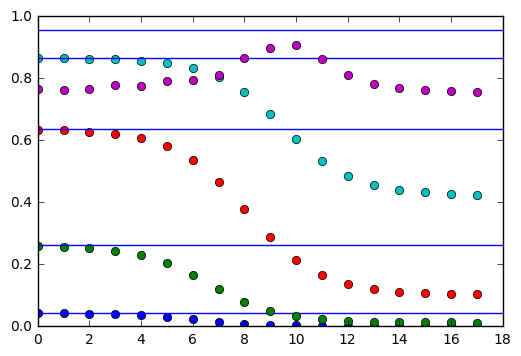

In [68]:
pltres(slcmn(h,8),rtot*2.41,parm7)

In [144]:
def numsl_2(parms,rtot,ligser):
    #numerically solves wyman system of eqs for given rtots and ligand concs
    #solves against 10 randomly noise parm sets (noises +/- 5% of parm val)
    parmsets = [np.random.normal(1,0.05,4) * parms for i in range(10)]
    resset = [np.array([[optimize.root(wymsol,guess,args=(q,j,i),method='lm',options={'factor':0.1}).x for i in ligser] for j in rtot]) for q in parmsets]
    fraxset = [[frax(i) for i in j] for j in resset]
    
    return fraxset
    

In [145]:
h = numsl_2(parm7,rtot*2.41,ligser)

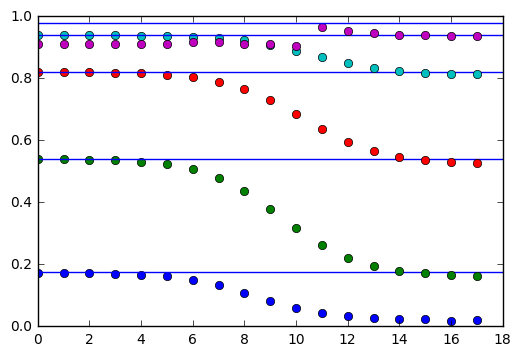

In [146]:
pltres(slcmn(h,8),rtot*2.41,parm7)

In [147]:
parm7 = np.array([4.6,5.3,0.34,530.])

In [156]:
h = numsl_2(parm7,rtot,ligser)

ValueError: too many values to unpack (expected 6)

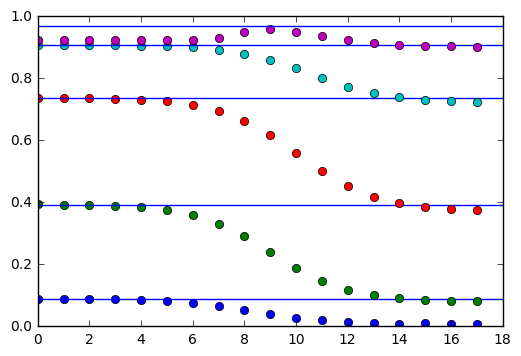

In [149]:
pltres(slcmn(h,8),rtot,parm7)

In [153]:
rts = np.array([ 0.001 ,  0.0025,  0.005 ,  0.01  ,  0.025 ,  0.05  ])

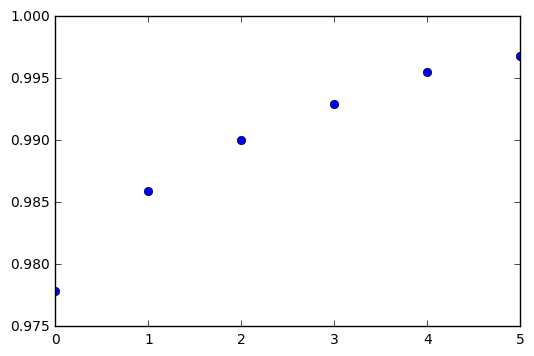

In [154]:
plt.plot(dimfun(rts,1000000)[1],'o')

In [155]:
weirdsim = numsl_2(np.array([  4.46042795e+01,   5.54982900e+00,   8.88031378e-01,
         5.79091318e+05]),rts,ligser)

ValueError: too many values to unpack (expected 6)

In [ ]:
ligser

In [ ]:
ligser

In [ ]:
parm7

In [ ]:
parmwerd = np.array([  4.46042795e+01,   5.54982900e+00,   8.88031378e-01,
         5.79091318e+05])

In [ ]:
parmwerd

In [ ]:
hwerd = numsl_2(parm7,rtot,ligser)